# Exploration

## Imports

In [1]:
# Standard imports
import numpy as np
import pandas as pd

# My imports
import wrangle as w
import explore as e

# Viz imports
import matplotlib.pyplot as plt
import seaborn as sns

import pydataset



# Need to add this line to get plots to show!
%matplotlib inline

# Stats
from scipy import stats
import sklearn.preprocessing
from scipy.stats import pearsonr, spearmanr
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Exercises

Our Zillow scenario continues:

As a Codeup data science graduate, you want to show off your skills to the Zillow data science team in hopes of getting an interview for a position you saw pop up on LinkedIn. You thought it might look impressive to build an end-to-end project in which you use some of their Kaggle data **to predict property values** using some of their available features; who knows, you might even do some feature engineering to blow them away. **Your goal is to predict the values of single unit properties using the observations from 2017.**

In these exercises, you will run through the stages of exploration as you continue to work toward the above goal.

### 1. As with encoded vs. unencoded data, we recommend exploring un-scaled data in your EDA process.

### 2. Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

In [2]:
df, prep_df = w.get_zillow_data()
df

csv file found and loaded


bedrooms  bathrooms  area  taxvalue  taxamount  yearbuilt  county
4             4.0        2.0  3633  296425.0    6941.39       2005      LA
6             3.0        4.0  1620  847770.0   10244.94       2011      LA
7             3.0        2.0  2077  646760.0    7924.68       1926      LA
11            0.0        0.0  1200    5328.0      91.60       1972      LA
14            0.0        0.0   171    6920.0     255.17       1973      LA
...           ...        ...   ...       ...        ...        ...     ...
2152856       4.0        4.0  4375  422400.0   13877.56       2015      LA
2152858       4.0        3.0  2262  960756.0   13494.52       2015  Orange
2152859       4.0        4.5  3127  536061.0    6244.16       2014  Orange
2152861       3.0        2.5  1974  424353.0    5302.70       2015  Orange
2152862       4.0        4.0  2110  554009.0    6761.20       2014      LA

[2033255 rows x 7 columns]

In [3]:
train, validate, test = w.get_split(df)

In [4]:
train.head()

bedrooms  bathrooms  area  taxvalue  taxamount  yearbuilt  county
2079780       4.0        2.0  1741   71961.0    1068.55       1989      LA
846531        3.0        2.0  1210  188697.0    2616.71       1961      LA
515566        3.0        2.0  1440  326345.0    3486.58       1977  Orange
475465        4.0        2.0  1254  308303.0    6868.07       1960      LA
2058634       4.0        4.0  2172  157350.0    6574.08       1993      LA

In [5]:
train.shape, validate.shape, test.shape

((1219953, 7), (406651, 7), (406651, 7))

In [6]:
tr_sub = train.head(1000)
tr_sub

bedrooms  bathrooms  area  taxvalue  taxamount  yearbuilt  county
2079780       4.0        2.0  1741   71961.0    1068.55       1989      LA
846531        3.0        2.0  1210  188697.0    2616.71       1961      LA
515566        3.0        2.0  1440  326345.0    3486.58       1977  Orange
475465        4.0        2.0  1254  308303.0    6868.07       1960      LA
2058634       4.0        4.0  2172  157350.0    6574.08       1993      LA
...           ...        ...   ...       ...        ...        ...     ...
360455        3.0        2.0  1252  539259.0    6094.67       1972      LA
148388        4.0        2.5  1752  495285.0    5964.32       1959  Orange
1998765       4.0        2.0  1705  206357.0    2618.72       1954      LA
854959        2.0        1.0  1308  682784.0    7906.56       1921      LA
2148397       3.0        2.0  1270  184023.0    2528.73       1948      LA

[1000 rows x 7 columns]

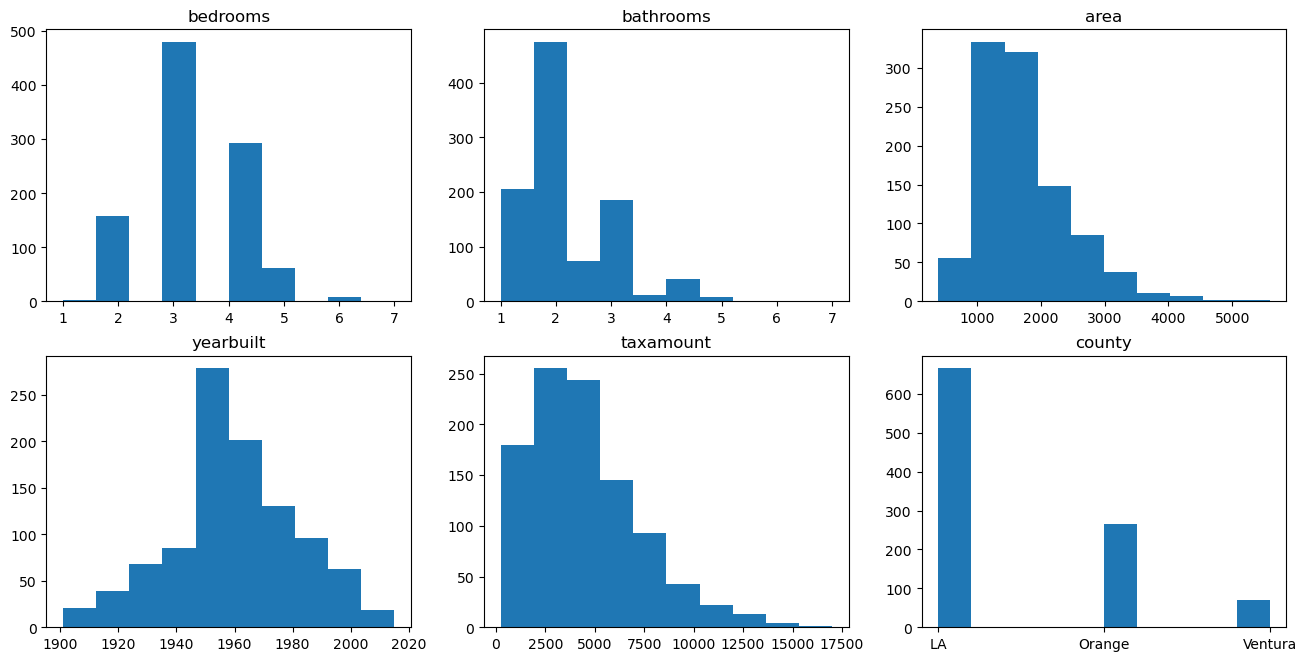

In [7]:
plt.figure(figsize=(16, 12))

# list of columns
cols = ['bedrooms','bathrooms','area','yearbuilt','taxamount','county']

for i, col in enumerate(cols):
    # i starts at 0, but plot no.s should start at 1
    plot_number = i+1
    
    # Create a subplot
    plt.subplot(3,3, plot_number)
    
    # Title with columns name
    plt.title(col)
    
    # Display histogram for column
    tr_sub[col].hist(grid=False, bins=10)
    
    # Hide gridlines
    plt.grid(False)

### 3. Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

In [8]:
def plot_variable_pairs(tr_sub):
    # We can drop the redundant information in the upper right half of the chart if we like.
    g = sns.pairplot(data=tr_sub.drop(columns='taxvalue'), corner=True, kind='reg')
    g.map_lower(sns.regplot, line_kws={'color': 'orange'})
    plt.show()


### 4. Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

In [9]:
cat_var = ['bedrooms','bathrooms','county']
cont_var = ['area','yearbuilt','taxamount','tax_rate']

In [10]:
def plot_categorical_and_continuous_vars(tr_sub, cat_var, cont_var):
    for cat_col in cat_var:
        for cont_col in cont_var:
            # Subset the dataframe based on the loop variables
            temp_df = tr_sub[[cat_col, cont_col]]

            # Boxplot
            plt.figure(figsize=(8,6))
            sns.boxplot(x=cat_col, y=cont_col, data=temp_df)
            plt.title(f"{cat_col} vs. {cont_col} (Boxplot)")
            plt.show()

            # Violin plot
            plt.figure(figsize=(8,6))
            sns.violinplot(x=cat_col, y=cont_col, data=temp_df)
            plt.title(f"{cat_col} vs. {cont_col} (Violin plot)")
            plt.show()

            # Swarm plot
            plt.figure(figsize=(8,6))
            sns.swarmplot(x=cat_col, y=cont_col, data=temp_df)
            plt.title(f"{cat_col} vs. {cont_col} (Swarm plot)")
            plt.show()


### 5. Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.

>- The function was saved in the explore.py file

### 6. Use the functions you created above to explore your Zillow train dataset in your explore.ipynb notebook.

In [13]:
cat_var = ['bedrooms','bathrooms','county']
cont_var = ['area','yearbuilt','taxamount']

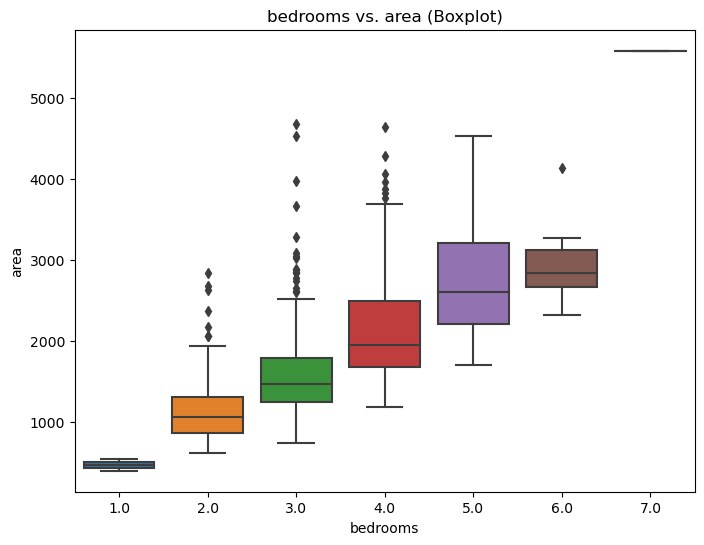

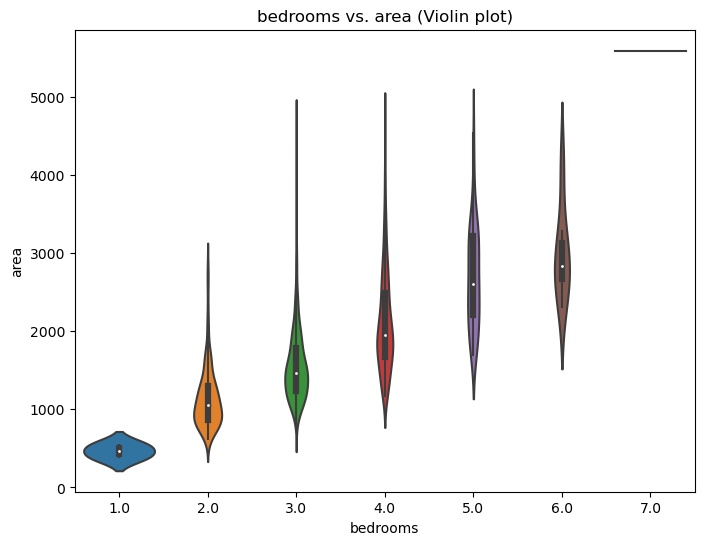

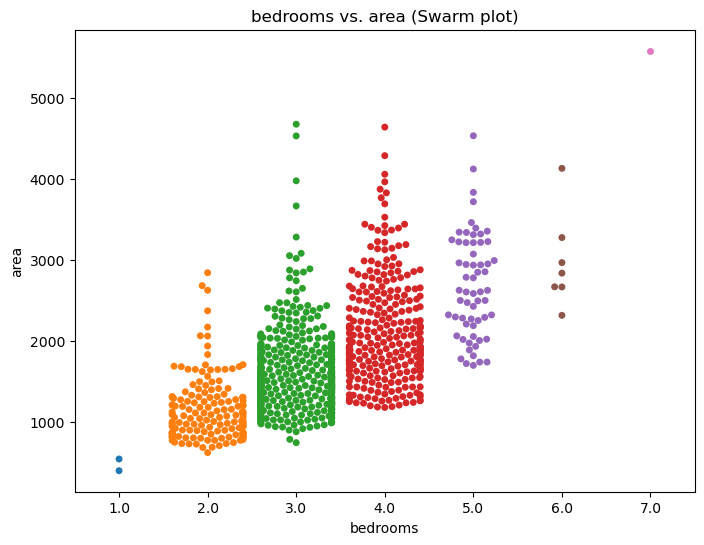

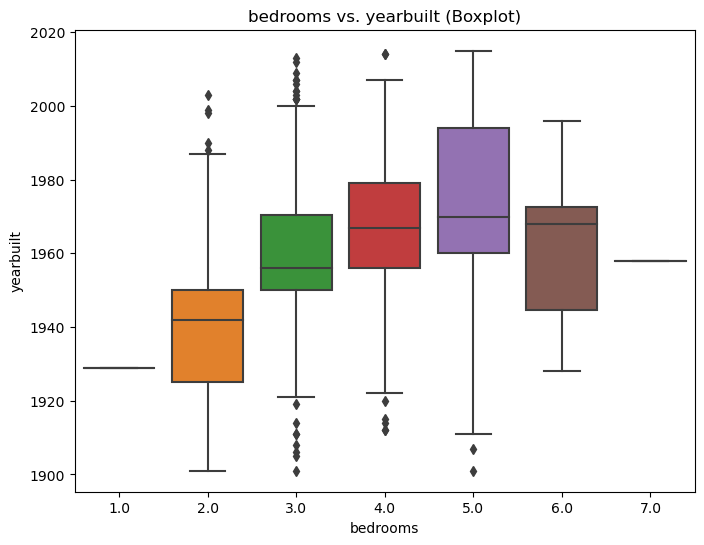

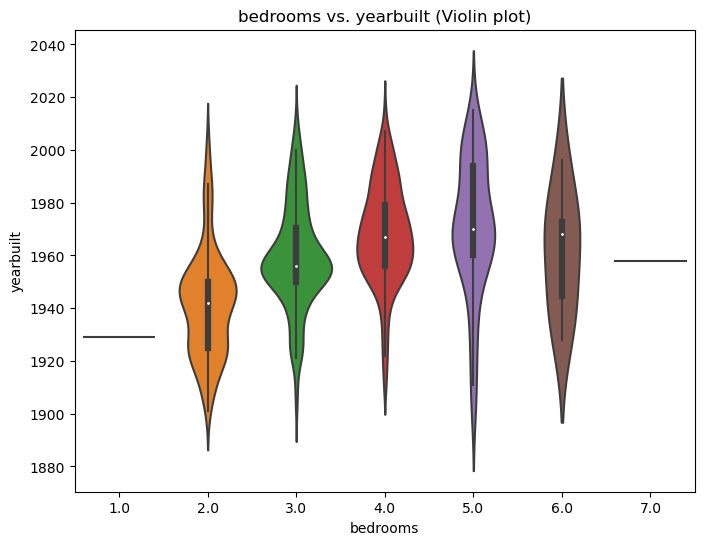

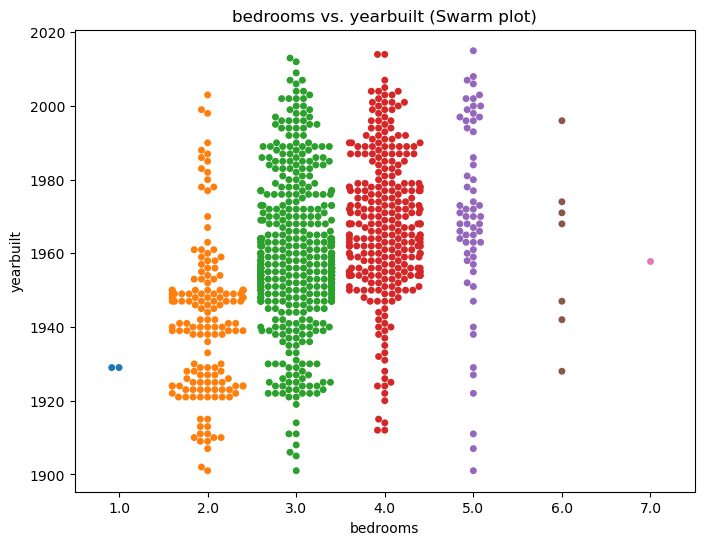

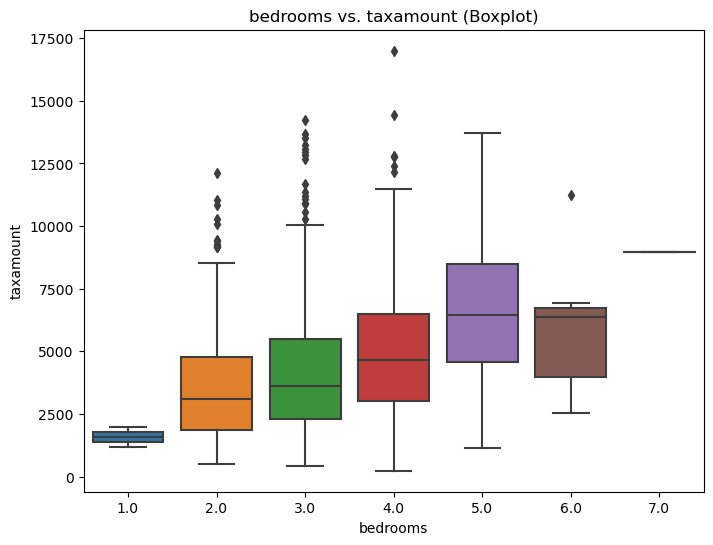

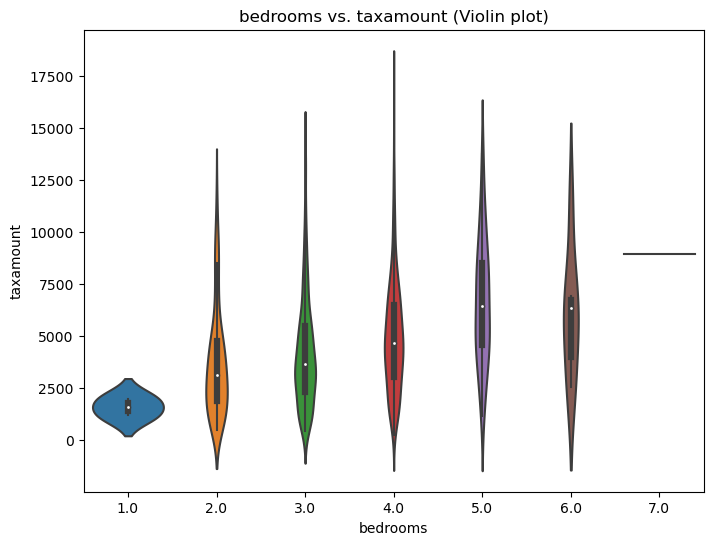

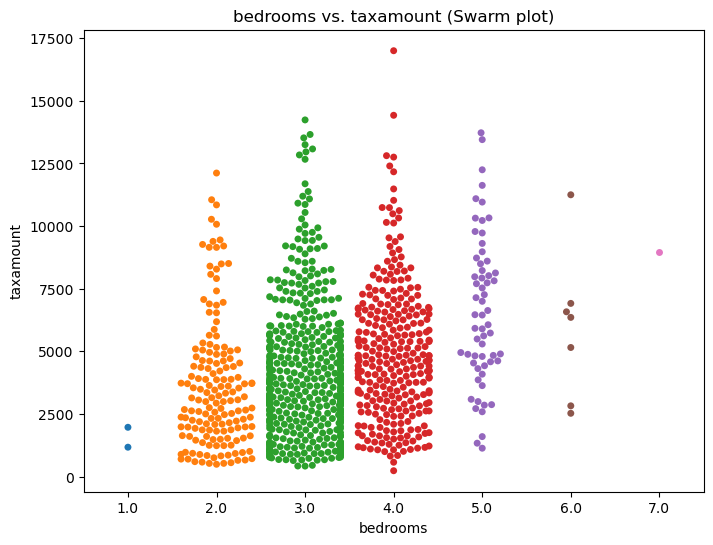

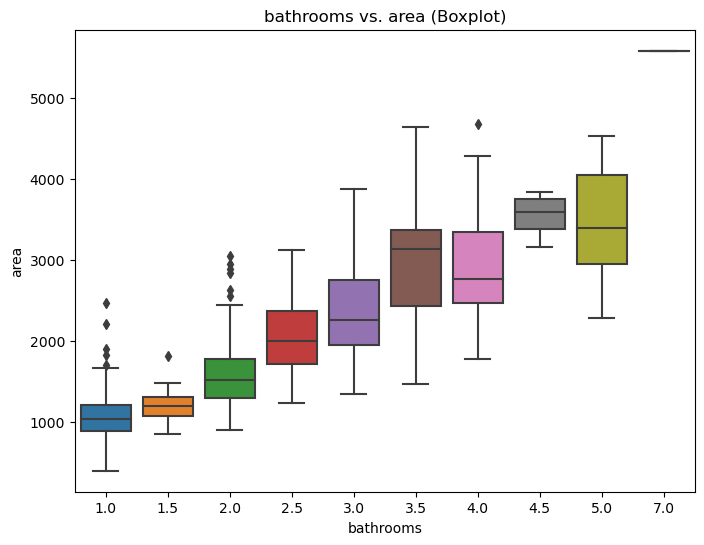

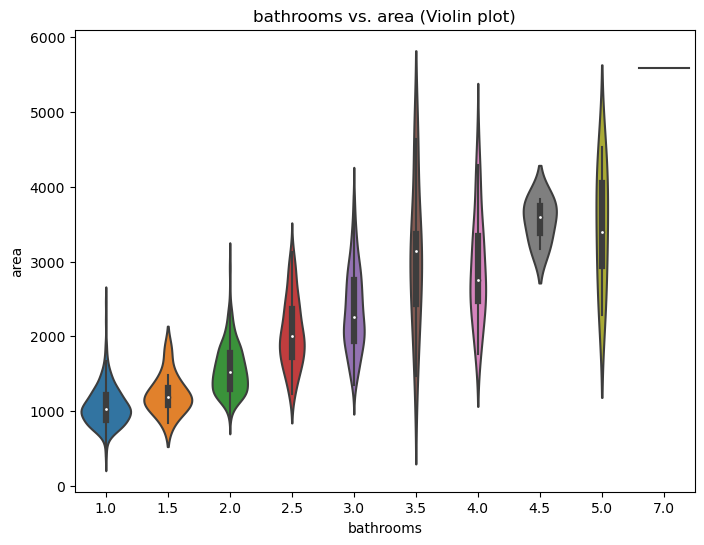

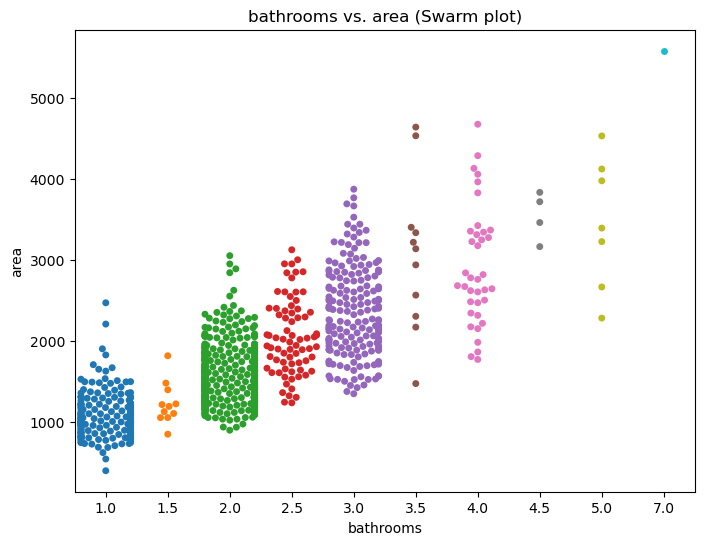

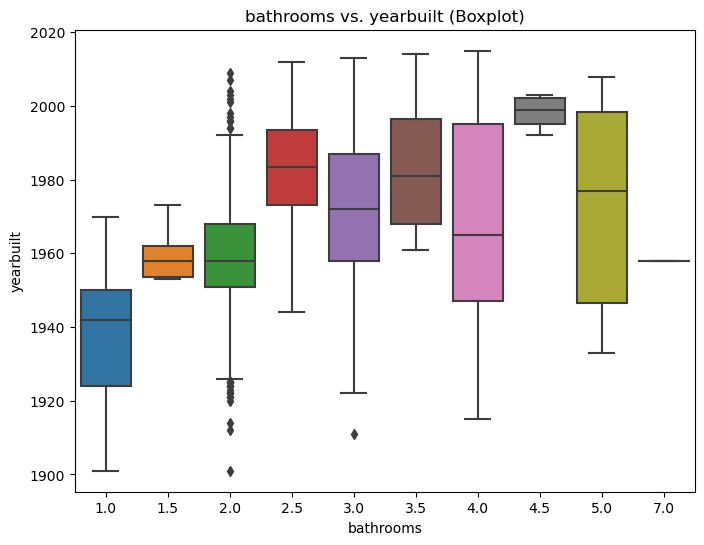

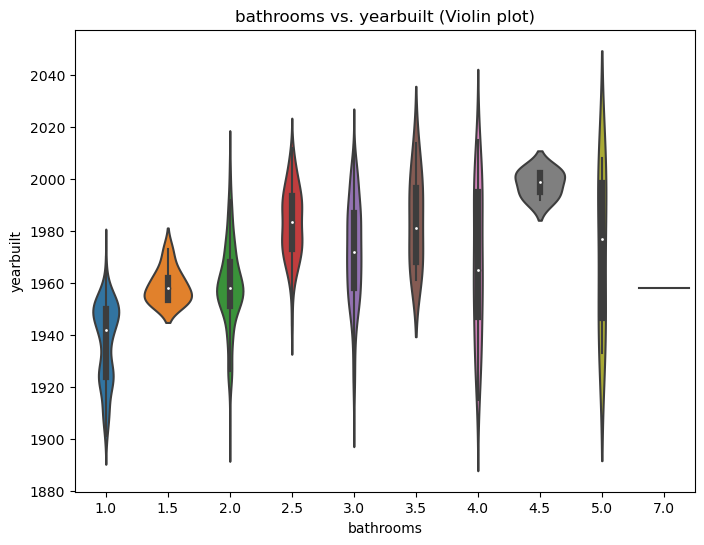

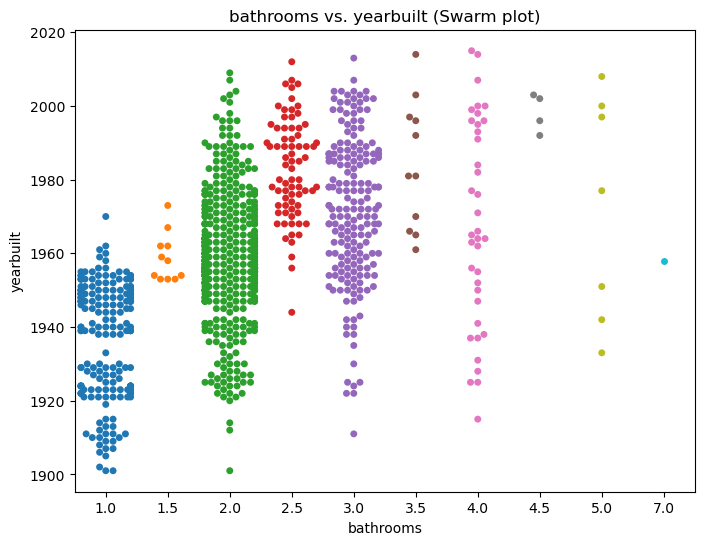

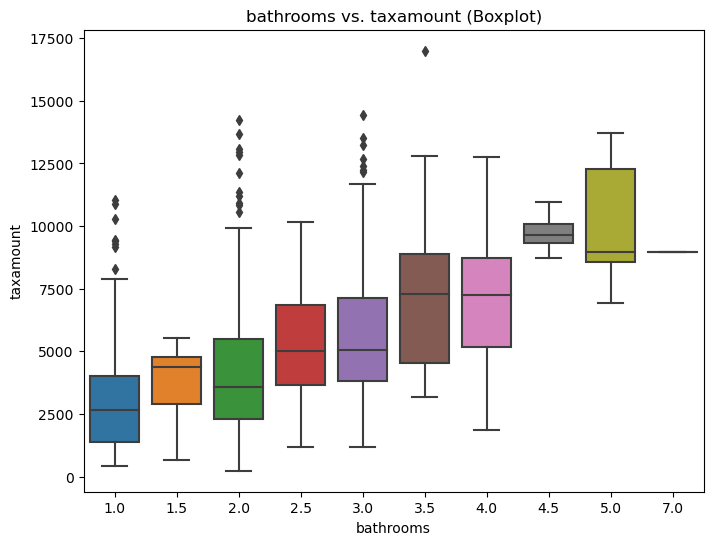

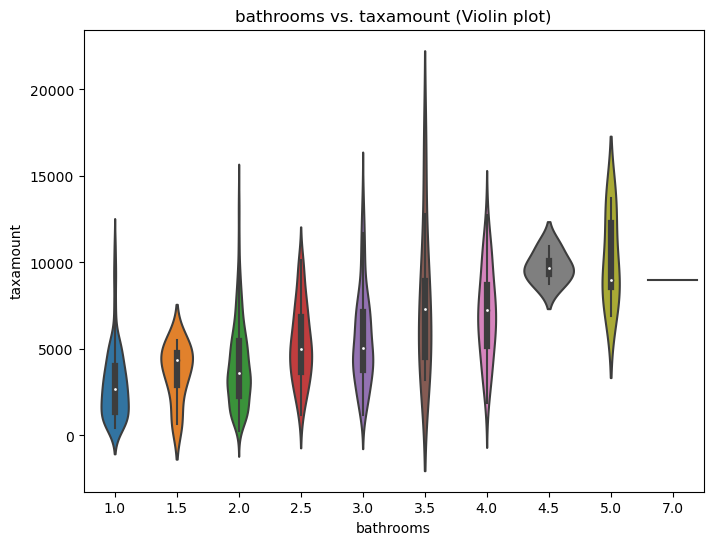

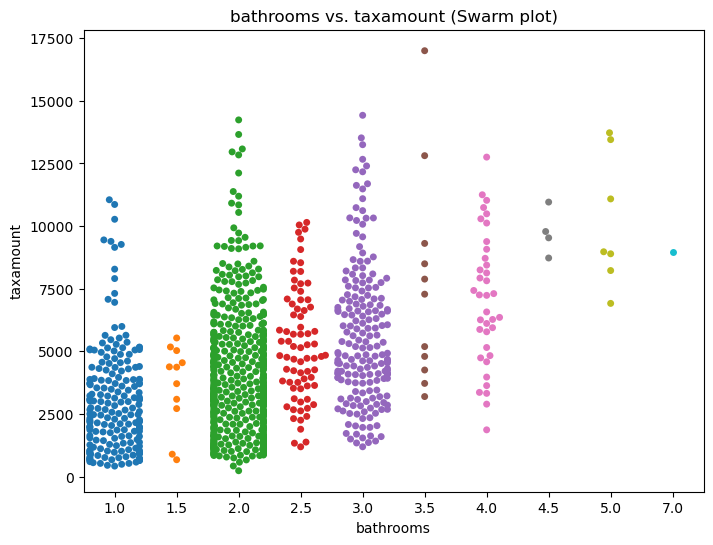

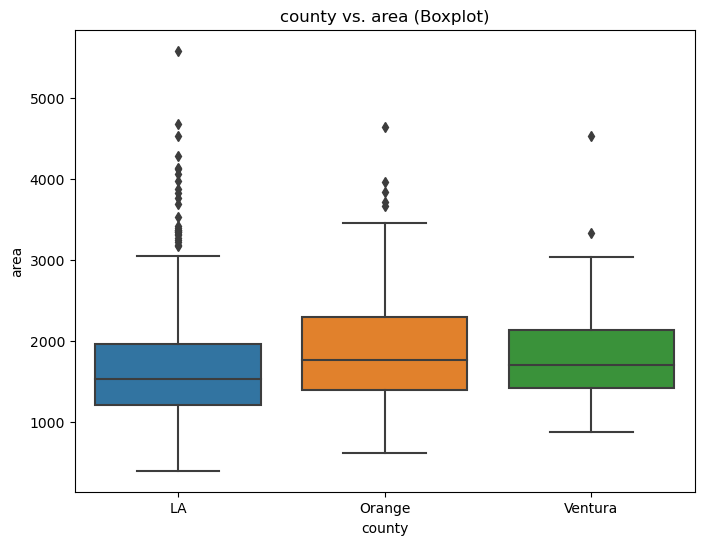

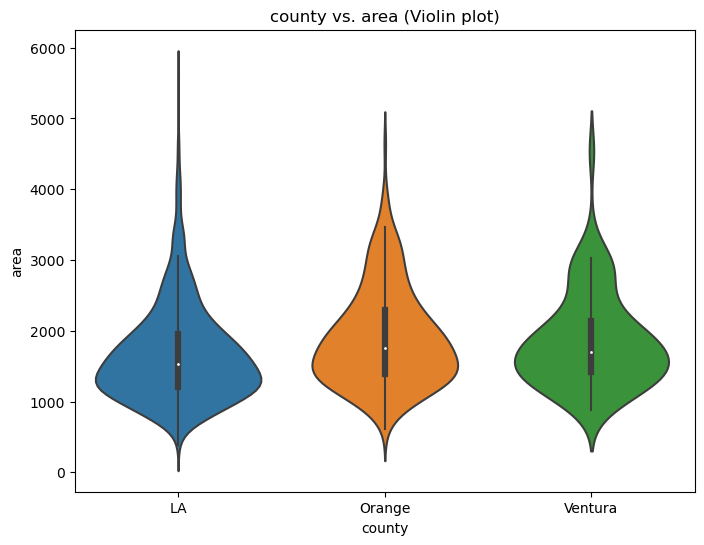

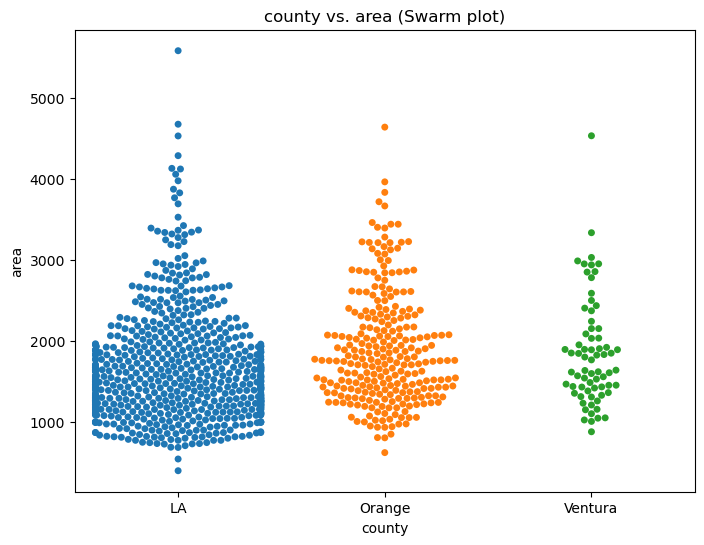

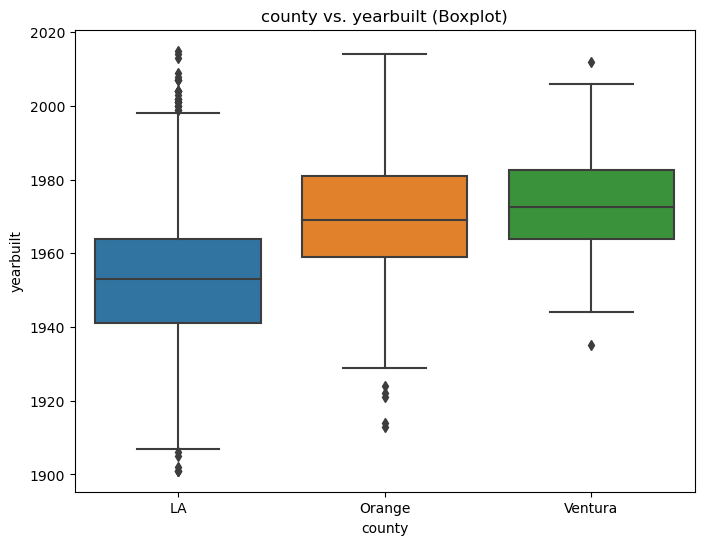

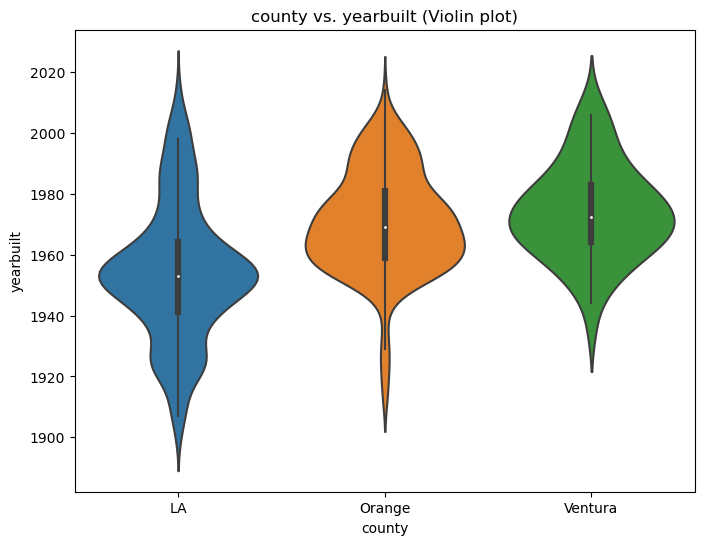

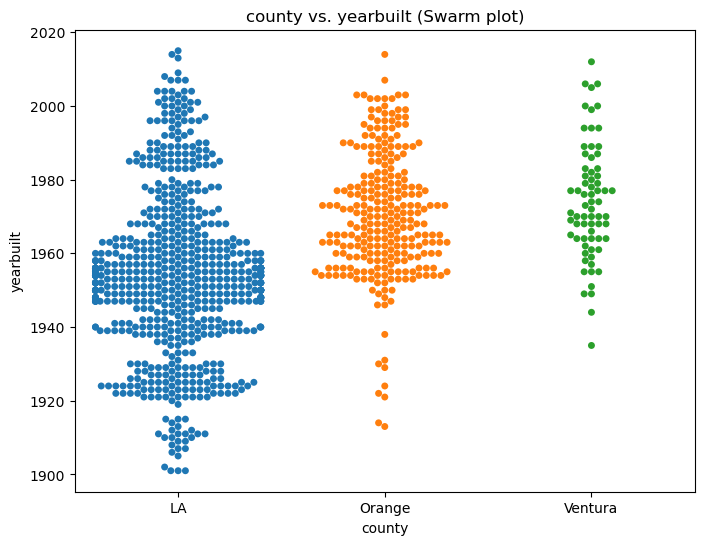

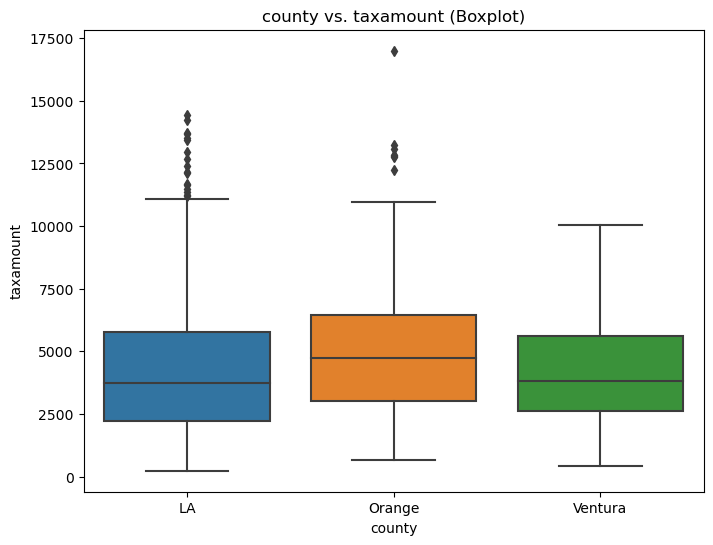

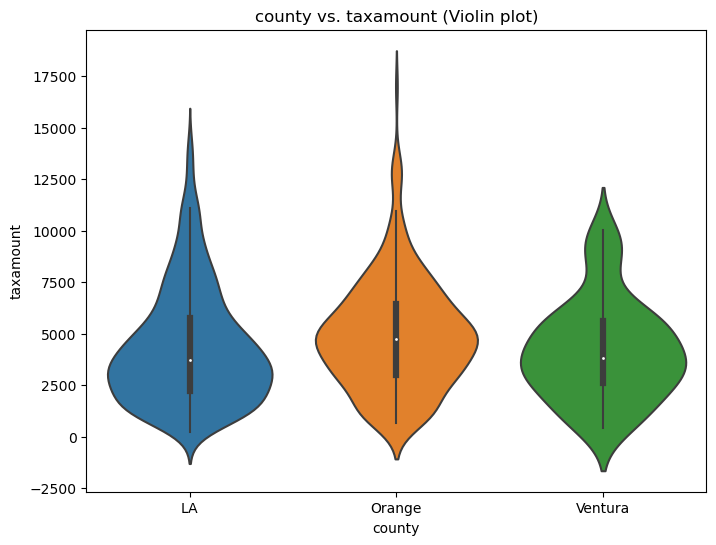

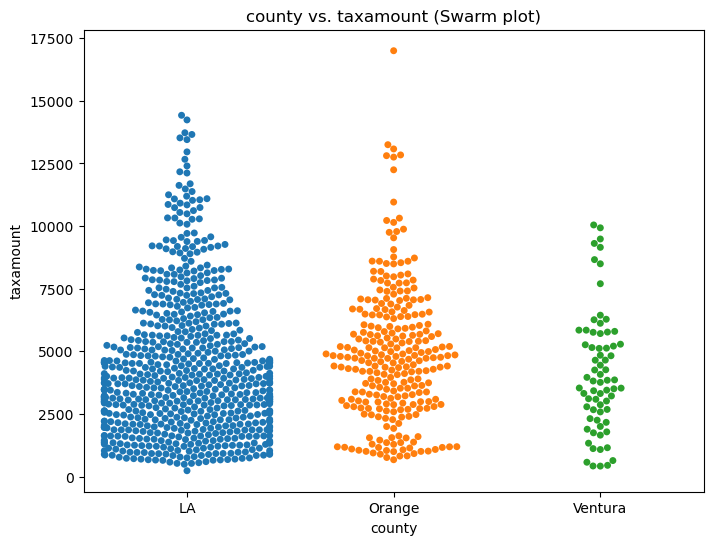

In [14]:
plot_categorical_and_continuous_vars(tr_sub, cat_var, cont_var)

### 7. Come up with some initial hypotheses based on your goal of predicting property value.

#### Hypothesis

You thought it might look impressive to build an end-to-end project in which you use some of their Kaggle data **to predict property values** using some of their available features; who knows, you might even do some feature engineering to blow them away. **Your goal is to predict the values of single unit properties using the observations from 2017.**

     $H_{0}$ : There is not  a linear relationship between number of bedrooms and property values.

     $H_{a}$ : There is a linear relationship between number of bedrooms and property values.
### ----------------------------------------------------------------------------------
     $H_{0}$ : There is no relationship between number of bathrooms and property value.

     $H_{a}$ : There is a relationship between number of bathrooms and property value.
### ----------------------------------------------------------------------------------
     $H_{0}$ : There is no relationship between area and property value.

     $H_{a}$ : There is a relationship between area and property value.
### ----------------------------------------------------------------------------------
     $H_{0}$ : There is no relationship between county code and property value.

     $H_{a}$ : There is a relationship between county code and property value.
### ----------------------------------------------------------------------------------
     $H_{0}$ : There is no relationship between year built and property value.

     $H_{a}$ : There is a relationship between year built and property value.
### ----------------------------------------------------------------------------------
     $H_{0}$ : There is no relationship between tax amount and property value.

     $H_{a}$ : There is a relationship between tax amount and property value.
### ----------------------------------------------------------------------------------
     $H_{0}$ : There is no relationship between tax rate and property value.

     $H_{a}$ : There is a relationship between tax rate and property value.
### ----------------------------------------------------------------------------------

### 8. Visualize all combinations of variables in some way.

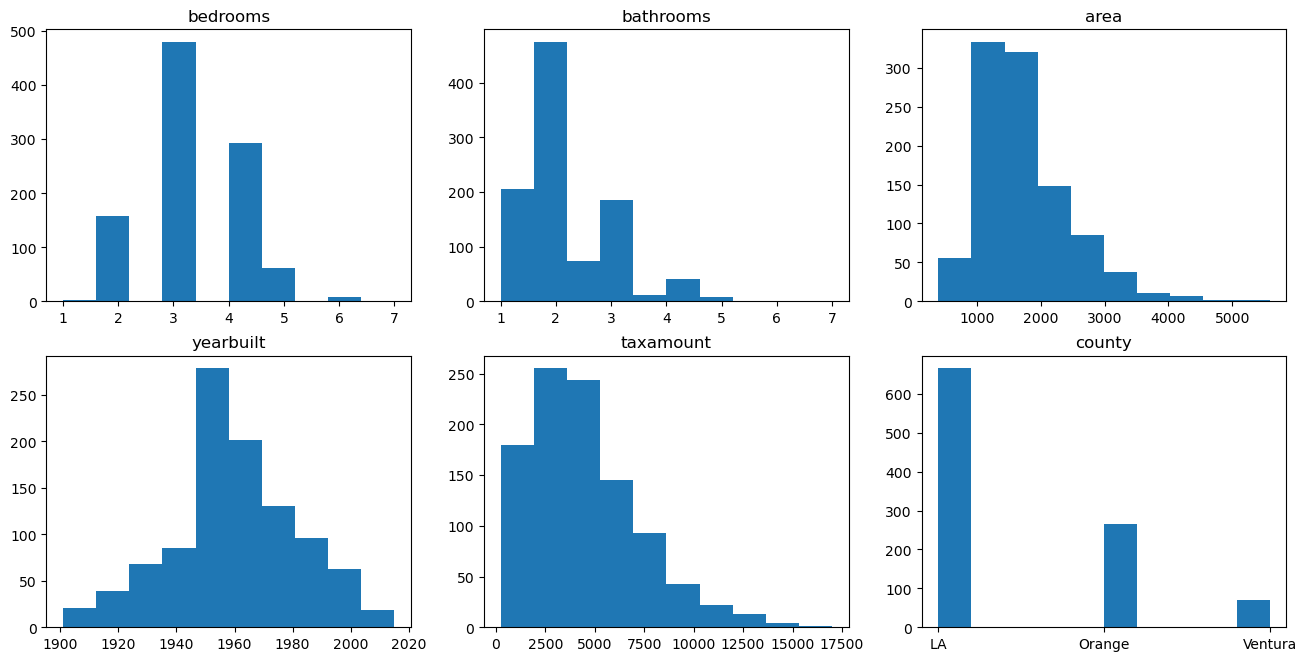

In [15]:
plt.figure(figsize=(16, 12))

# list of columns
cols = ['bedrooms','bathrooms','area','yearbuilt','taxamount','county']

for i, col in enumerate(cols):
    # i starts at 0, but plot no.s should start at 1
    plot_number = i+1
    
    # Create a subplot
    plt.subplot(3,3, plot_number)
    
    # Title with columns name
    plt.title(col)
    
    # Display histogram for column
    tr_sub[col].hist(grid=False, bins=10)
    
    # Hide gridlines
    plt.grid(False)

In [16]:
def plot_categorical_and_continuous_vars(df, cat_var, cont_var):

    # Boxplot
    plt.figure(figsize=(8,6))
    sns.boxplot(x=cat_var, y=cont_var, data=df)
    plt.title(f"{cat_var} vs. {cont_var} (Boxplot)")
    plt.show()

    # Violin plot
    plt.figure(figsize=(8,6))
    sns.violinplot(x=cat_var, y=cont_var, data=df)
    plt.title(f"{cat_var} vs. {cont_var} (Violin plot)")
    plt.show()

    # Swarm plot
    plt.figure(figsize=(8,6))
    sns.swarmplot(x=cat_var, y=cont_var, data=df)
    plt.title(f"{cat_var} vs. {cont_var} (Swarm plot)")
    plt.show()


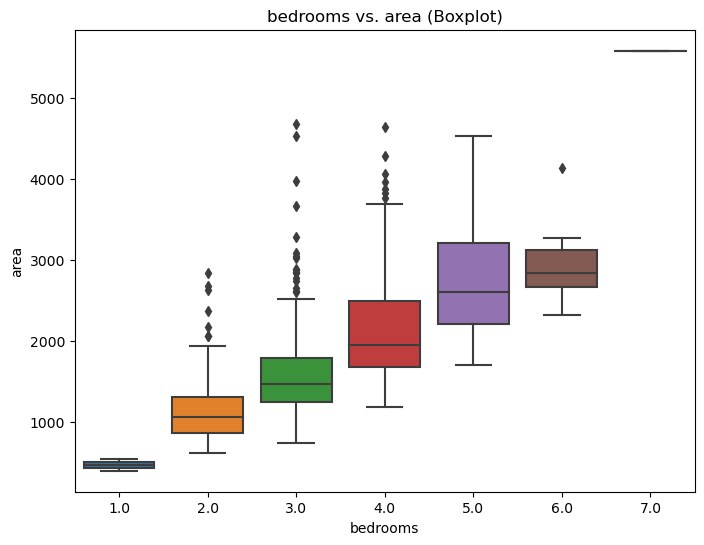

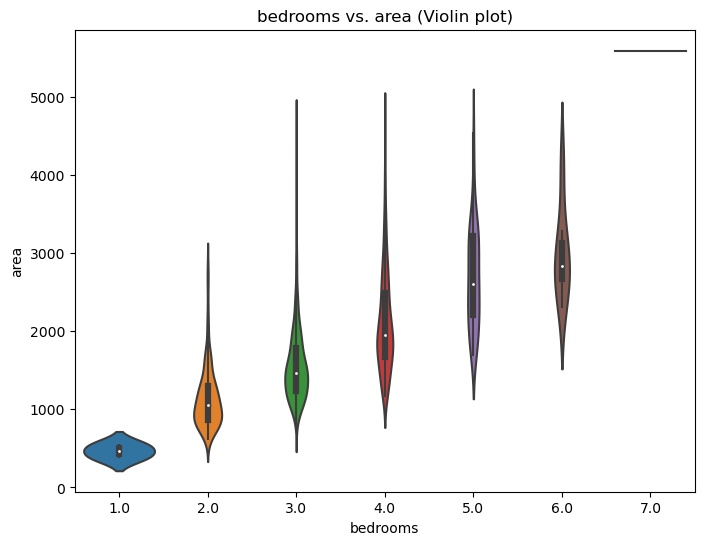

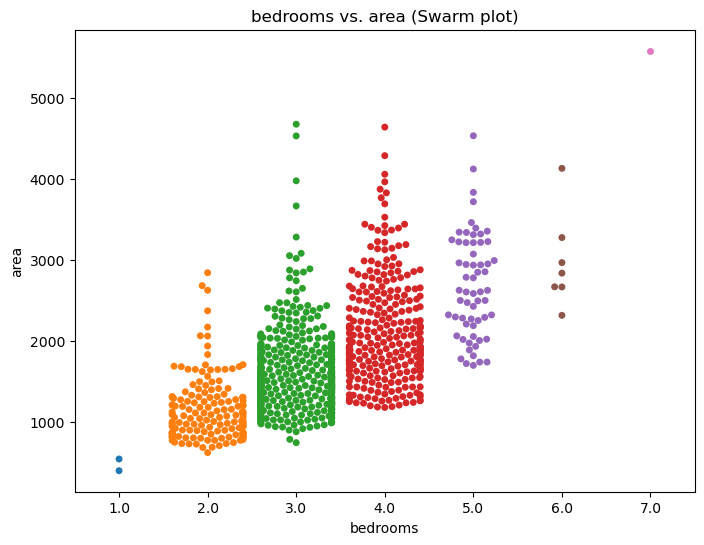

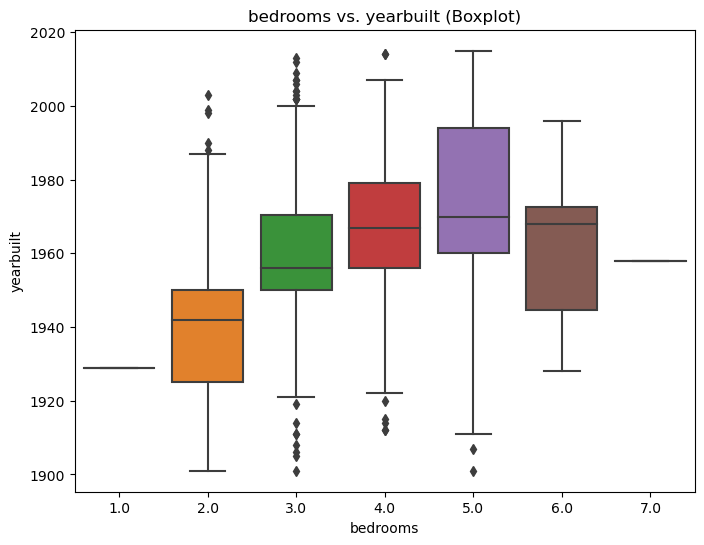

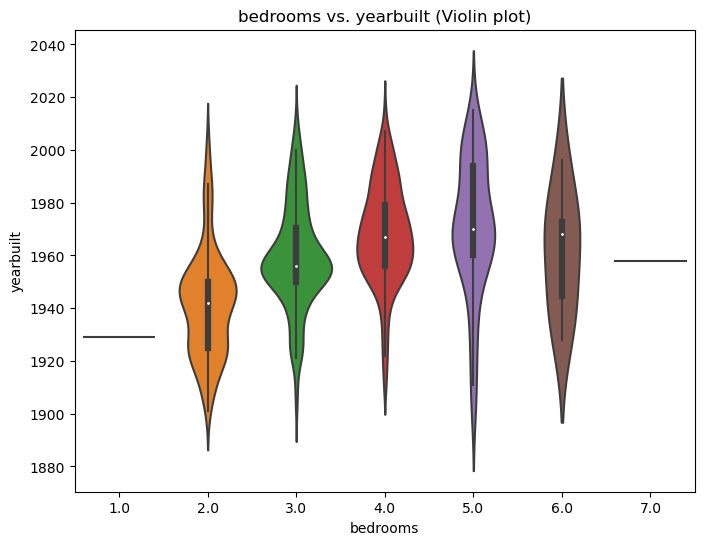

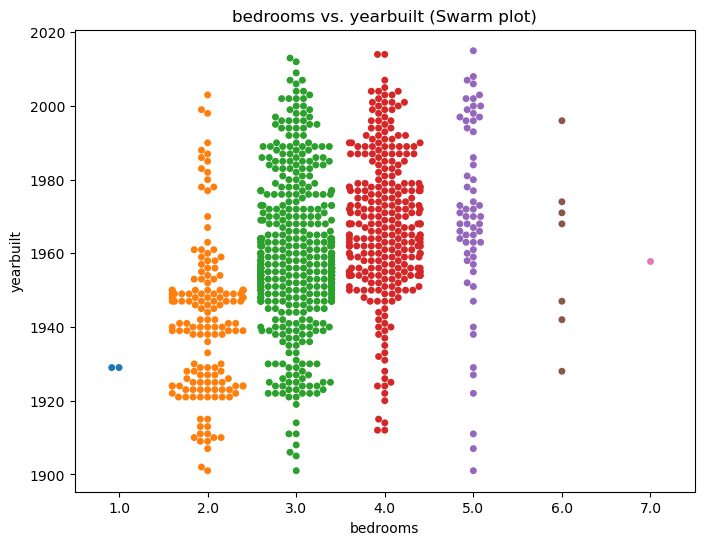

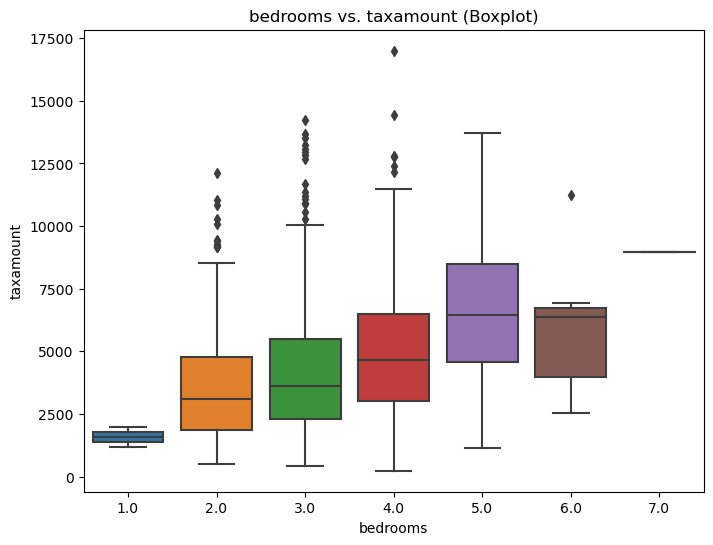

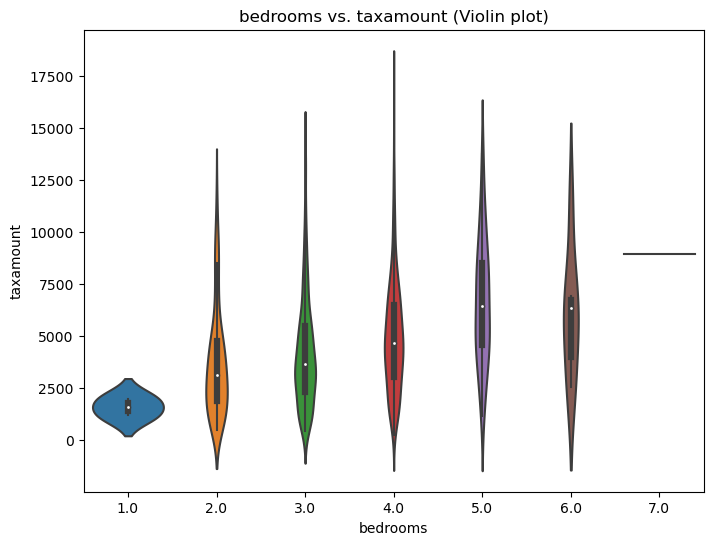

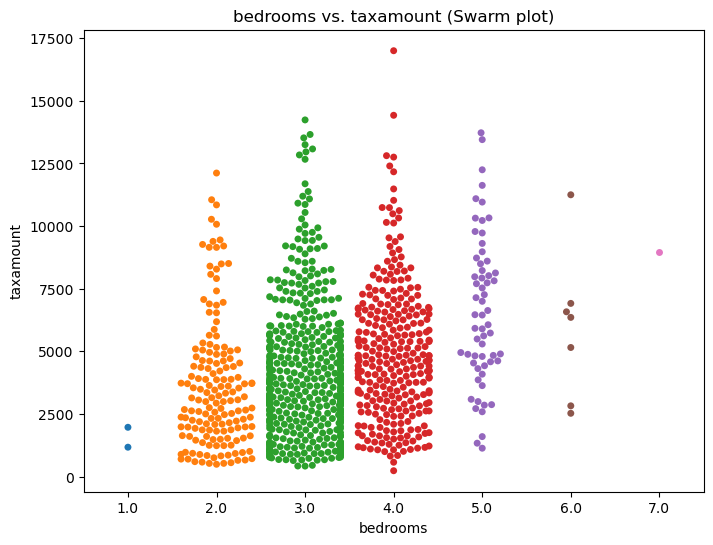

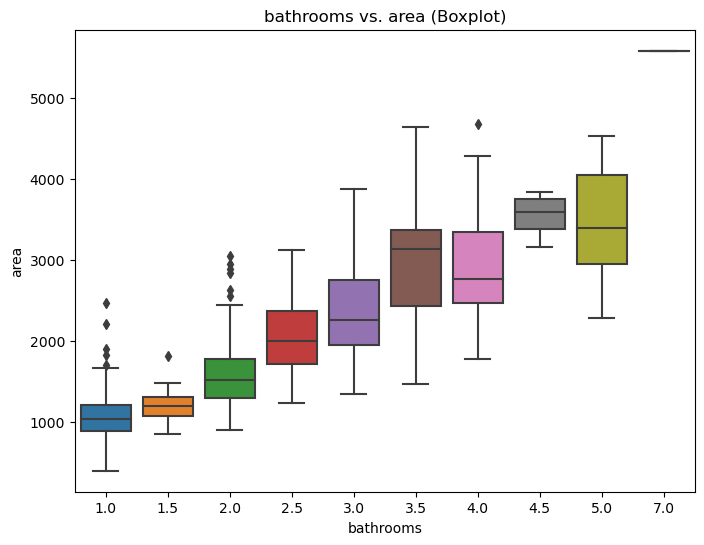

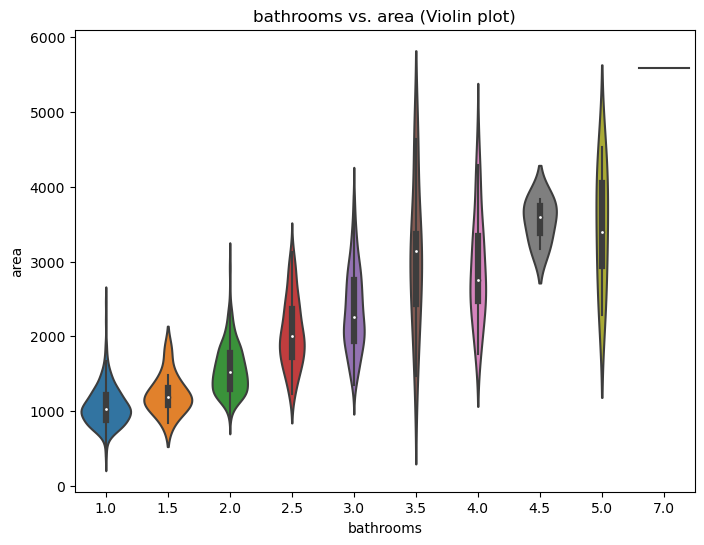

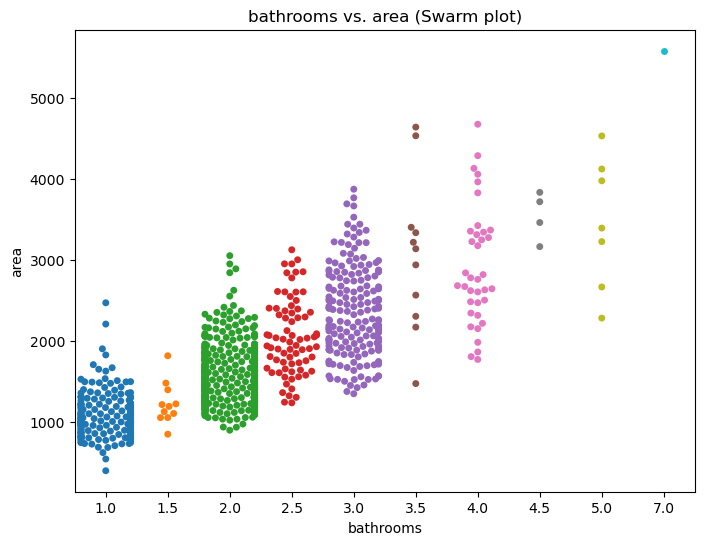

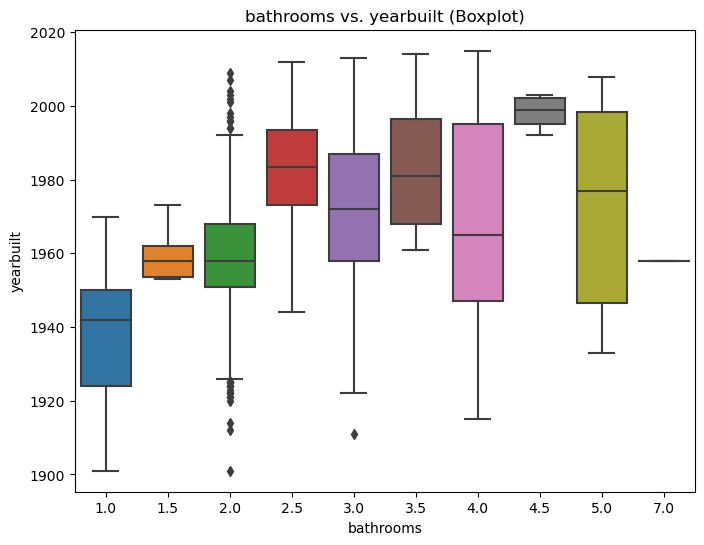

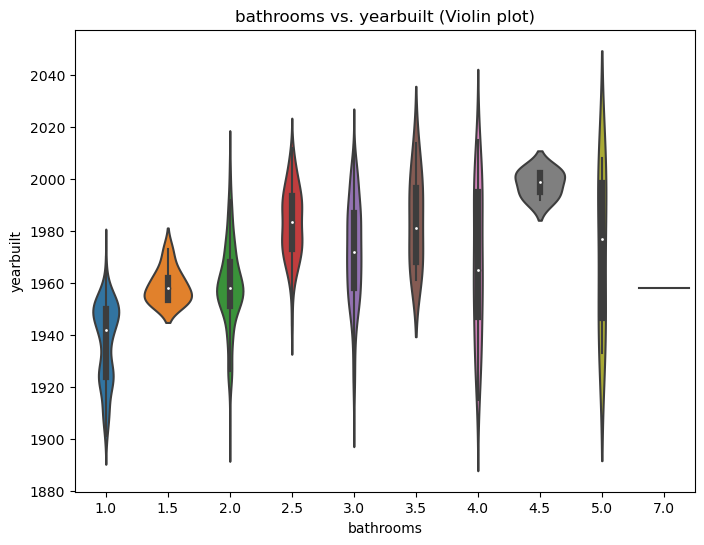

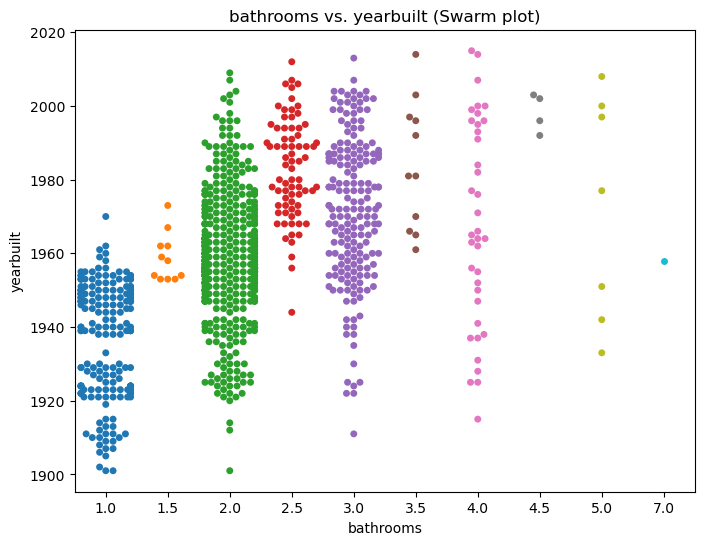

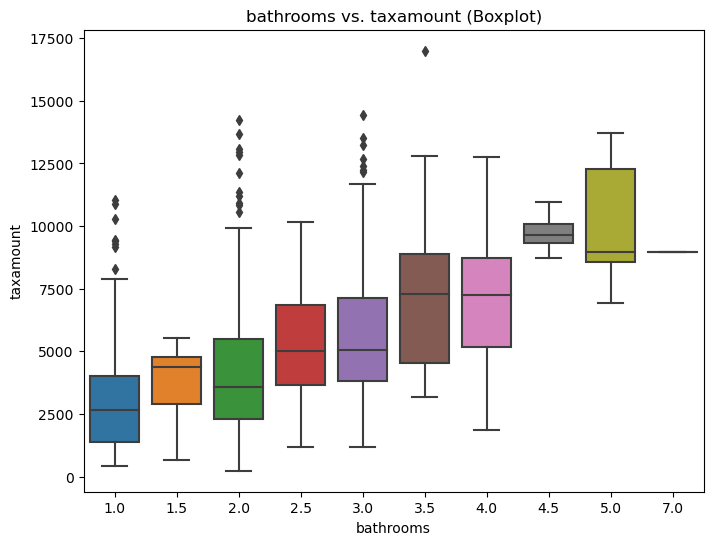

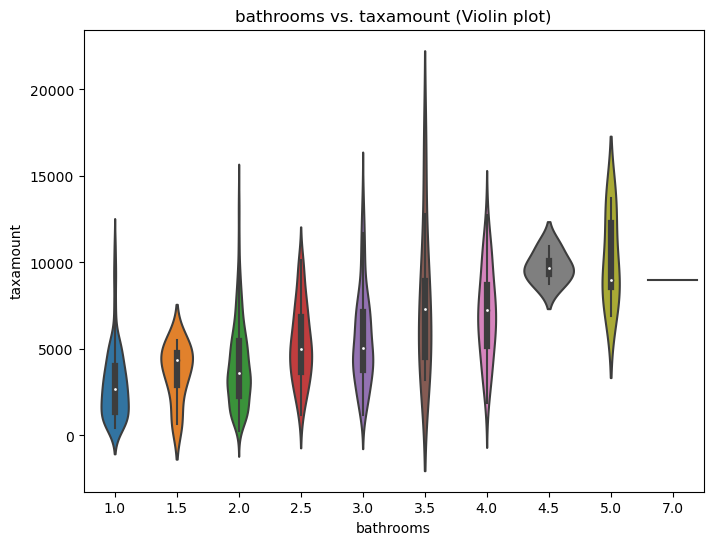

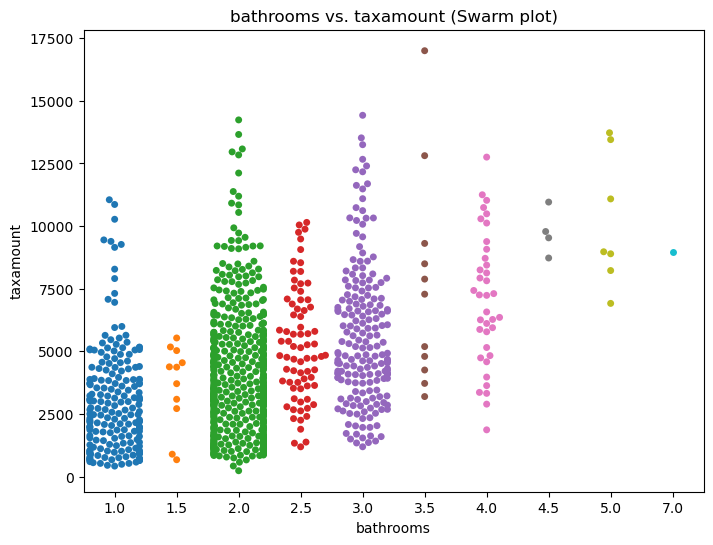

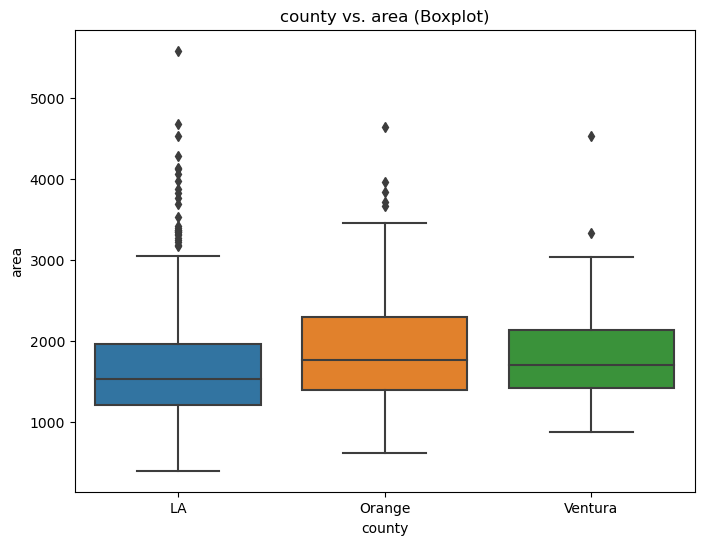

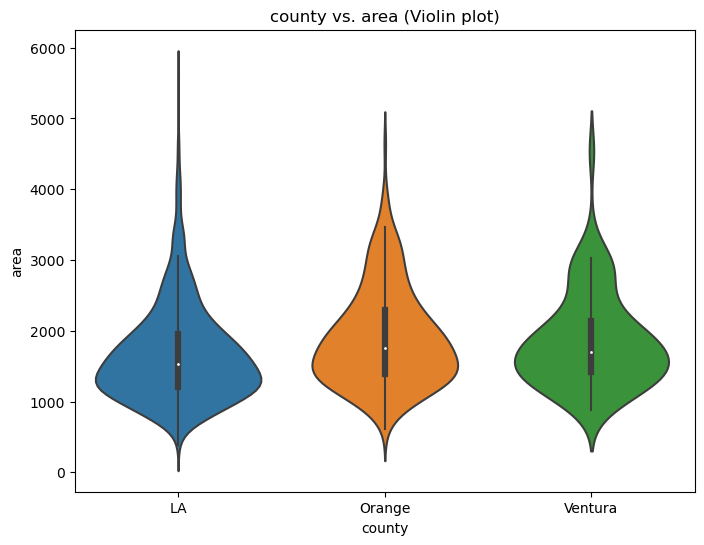

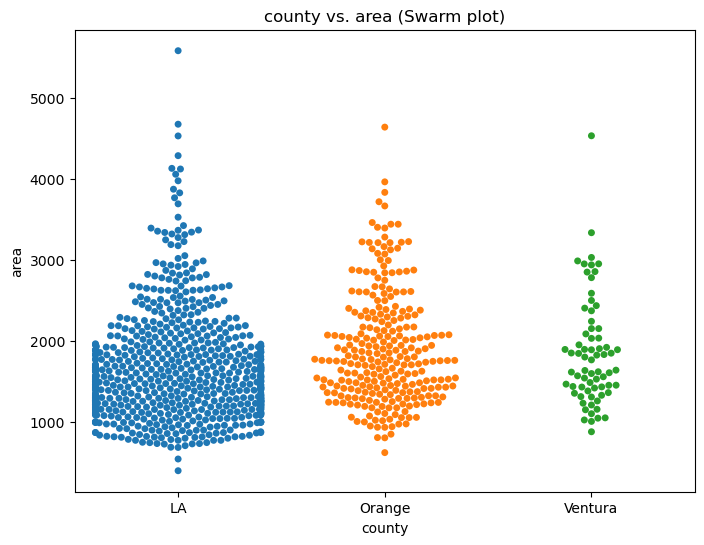

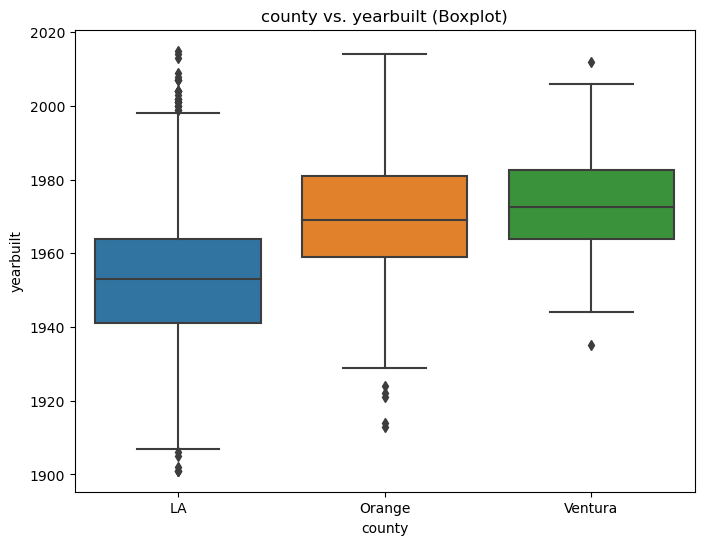

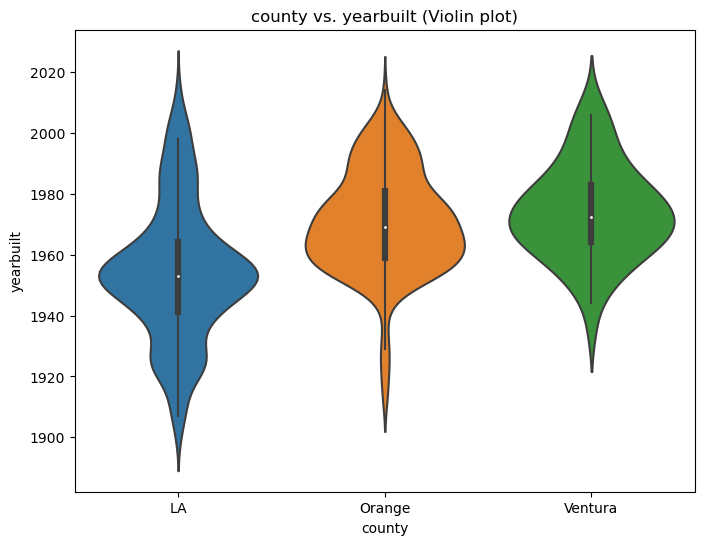

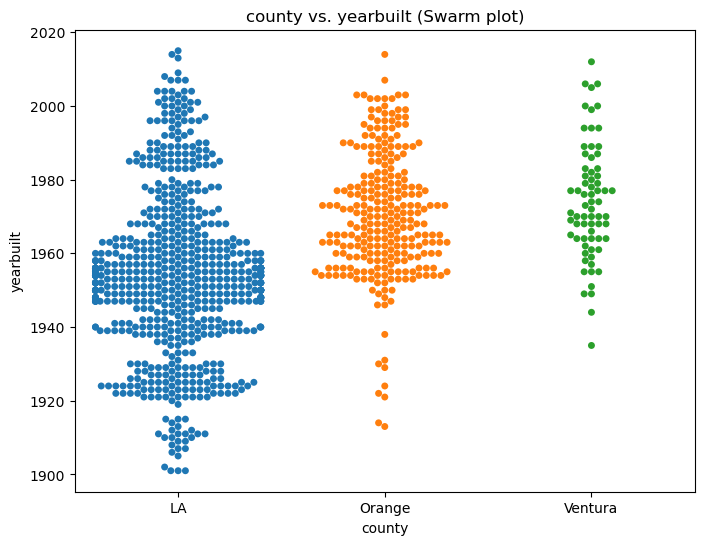

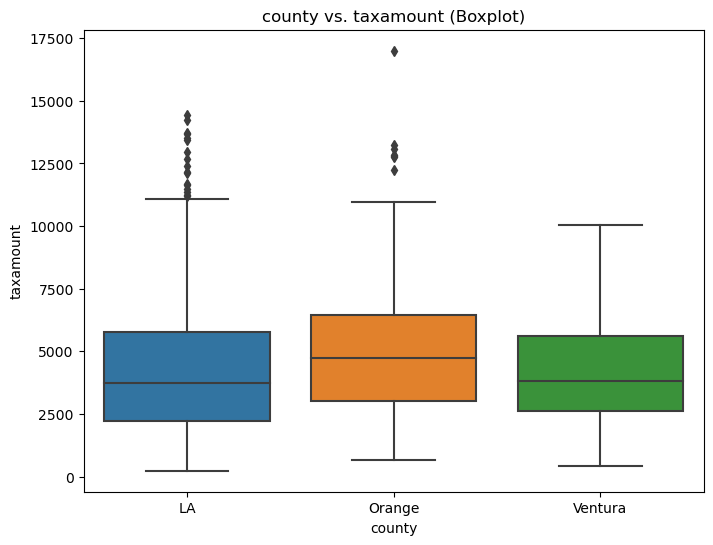

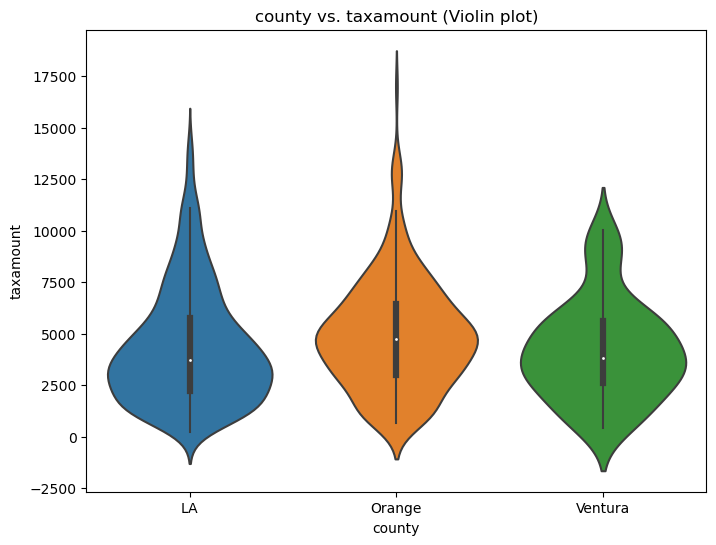

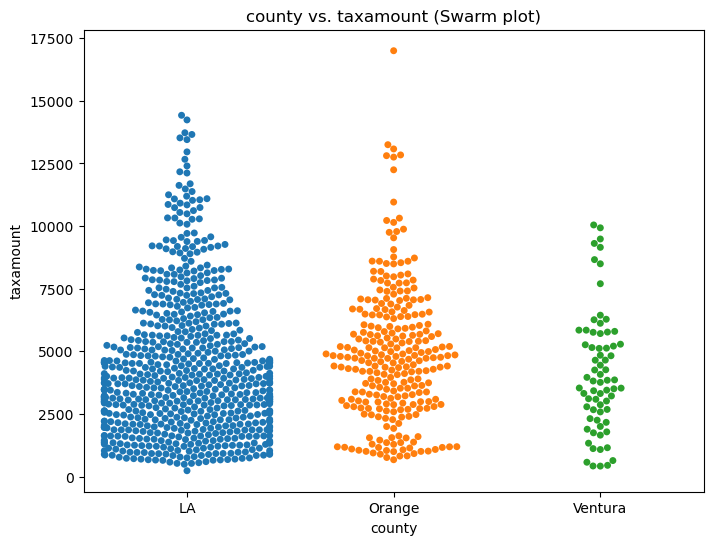

In [17]:
cat_var = ['bedrooms', 'bathrooms','county']
cont_var = ['area','yearbuilt','taxamount']

for cat_col in cat_var:
    for cont_col in cont_var:
        plot_categorical_and_continuous_vars(tr_sub, cat_col, cont_col)

### 9. Run the appropriate statistical tests where needed.

In [18]:
# Create the correlation matrix for all exams.

tr_sub_corr = tr_sub.drop(columns=['taxvalue']).corr()
tr_sub_corr

bedrooms  bathrooms      area  taxamount  yearbuilt
bedrooms   1.000000   0.618062  0.628453   0.251676   0.363563
bathrooms  0.618062   1.000000  0.783737   0.432144   0.510819
area       0.628453   0.783737  1.000000   0.505179   0.453413
taxamount  0.251676   0.432144  0.505179   1.000000   0.251392
yearbuilt  0.363563   0.510819  0.453413   0.251392   1.000000

In [19]:
# Since my variables are not normally distributed, I might choose Pearsonr instead.

tr_sub_pearsonr = tr_sub.drop(columns=['taxvalue']).corr(method='pearson')
tr_sub_pearsonr

bedrooms  bathrooms      area  taxamount  yearbuilt
bedrooms   1.000000   0.618062  0.628453   0.251676   0.363563
bathrooms  0.618062   1.000000  0.783737   0.432144   0.510819
area       0.628453   0.783737  1.000000   0.505179   0.453413
taxamount  0.251676   0.432144  0.505179   1.000000   0.251392
yearbuilt  0.363563   0.510819  0.453413   0.251392   1.000000

In [20]:
# Use a scipy stats function pearsonr to calculate the correlation coefficient and the p-value.

r, p_value = pearsonr(tr_sub.bedrooms, tr_sub.taxvalue)
print(f'Correlation Coefficient: {r}\nP-value: {p_value}')


Correlation Coefficient: 0.2574611263590528
P-value: 1.3252746114353974e-16


In [21]:
# Since my variables are not normally distributed, I might choose Spearman instead.

tr_sub_spearman = tr_sub.drop(columns=['taxvalue']).corr(method='spearman')
tr_sub_spearman

bedrooms  bathrooms      area  taxamount  yearbuilt
bedrooms   1.000000   0.618069  0.649605   0.260846   0.407663
bathrooms  0.618069   1.000000  0.789318   0.419520   0.568923
area       0.649605   0.789318  1.000000   0.465889   0.499526
taxamount  0.260846   0.419520  0.465889   1.000000   0.252642
yearbuilt  0.407663   0.568923  0.499526   0.252642   1.000000

In [22]:
# Use a scipy stats function spearmanr to calculate the correlation coefficient and the p-value.

r, p_value = spearmanr(tr_sub.bedrooms, tr_sub.taxvalue)
print(f'Correlation Coefficient: {r}\nP-value: {p_value}')


Correlation Coefficient: 0.2667168361078237
P-value: 9.514714197847296e-18


In [23]:
# Since my variables are not normally distributed, I might choose Spearman instead.

tr_spearman = tr_sub.corr(method='spearman')
tr_spearman

bedrooms  bathrooms      area  taxvalue  taxamount  yearbuilt
bedrooms   1.000000   0.618069  0.649605  0.266717   0.260846   0.407663
bathrooms  0.618069   1.000000  0.789318  0.420433   0.419520   0.568923
area       0.649605   0.789318  1.000000  0.470278   0.465889   0.499526
taxvalue   0.266717   0.420433  0.470278  1.000000   0.970757   0.249013
taxamount  0.260846   0.419520  0.465889  0.970757   1.000000   0.252642
yearbuilt  0.407663   0.568923  0.499526  0.249013   0.252642   1.000000

### 10. What independent variables are correlated with the dependent variable, home value?

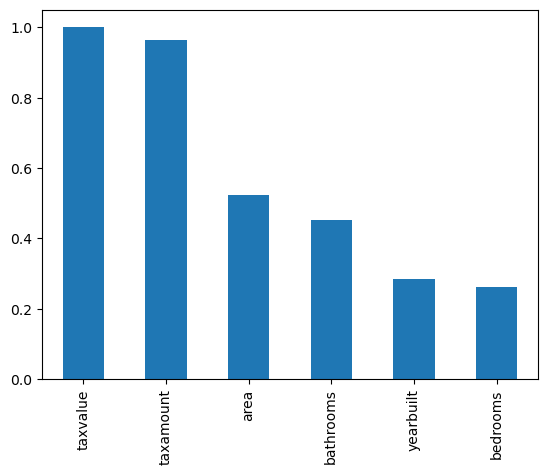

In [24]:
train.corr()['taxvalue'].sort_values(ascending = False).plot(kind='bar')
plt.show()

### 11. Which independent variables are correlated with other independent variables (bedrooms, bathrooms, year built, square feet)?

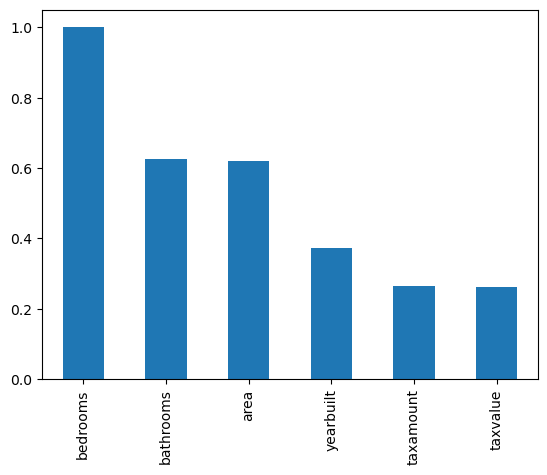

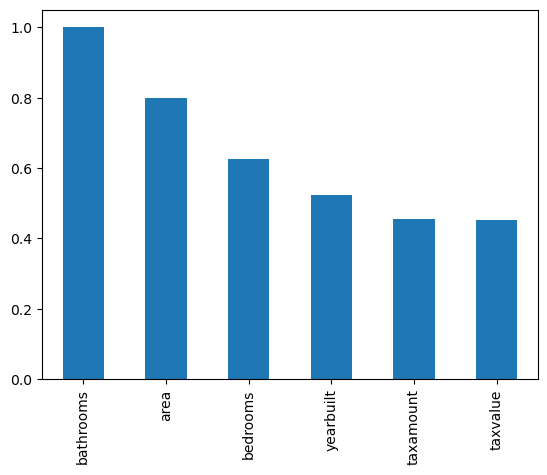

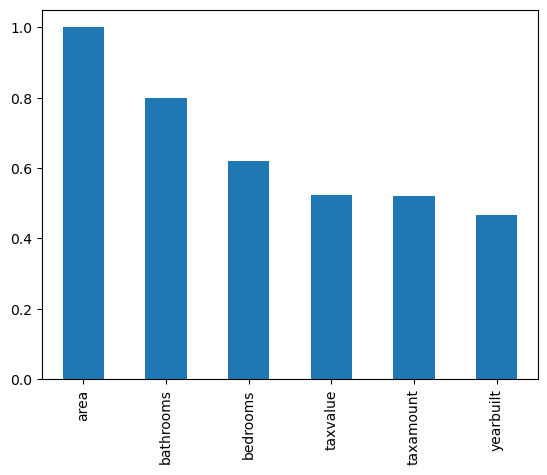

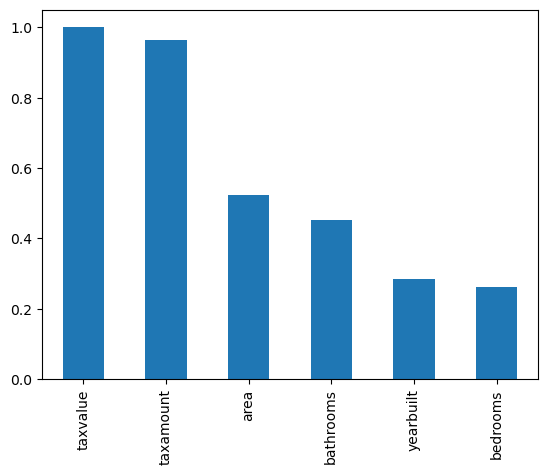

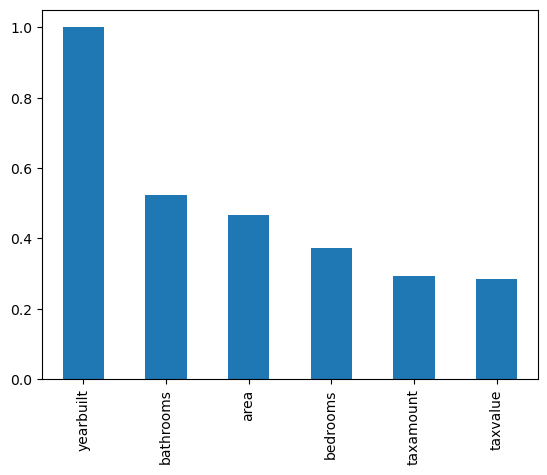

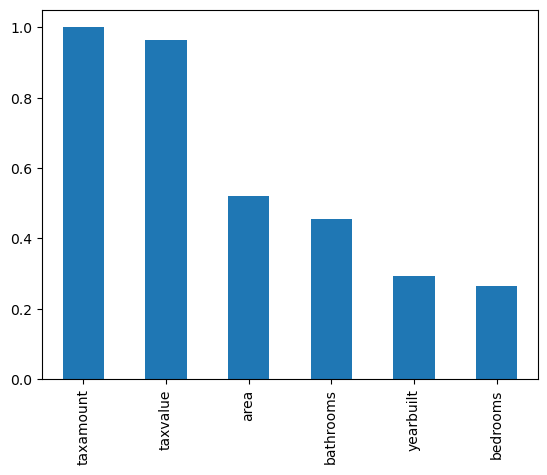

In [25]:
cols = ['bedrooms','bathrooms','area','taxvalue','yearbuilt','taxamount']
for col in cols:
    train.corr()[col].sort_values(ascending = False).plot(kind='bar')
    plt.show()

### 12. Make sure to document your takeaways from visualizations and statistical tests as well as the decisions you make throughout your process.

Bedrooms: Properties with more bedrooms will have a higher sale price.
Bathrooms: Properties with more bathrooms will have a higher sale price.
Area: Properties with a larger area will have a higher sale price.
Year built: Properties that are newer will have a higher sale price.
Tax amount: Properties with a higher tax amount will have a higher sale price.
Tax rate: Properties with a lower tax rate will have a higher sale price.

### 13. Explore your dataset with any other visualizations you think will be helpful.

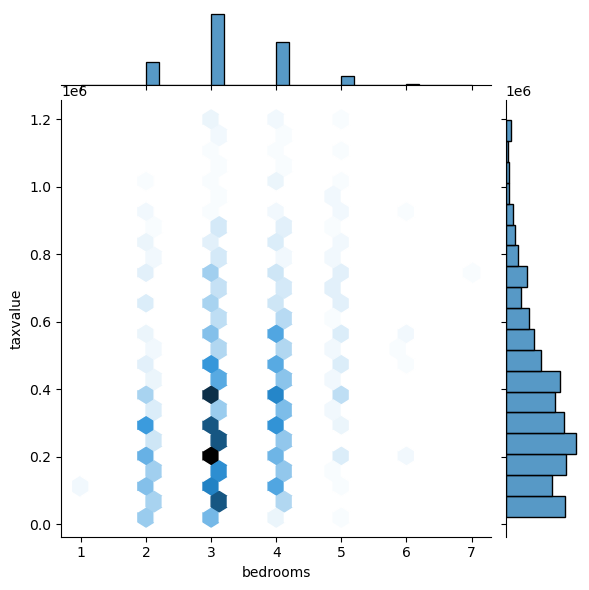

In [26]:
# Create a hexbin plot
sns.jointplot(data=tr_sub, x='bedrooms', y='taxvalue', kind='hex')